In [7]:
import numpy as np
from glob import glob
import cv2     
import os
import PIL.Image
import matplotlib.pyplot as plt                        
%matplotlib inline 
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision.models import vgg16, resnet101
from torchvision import datasets, transforms

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [17]:
data_dir = 'dogImages/'

data_transforms_train =  transforms.Compose([
        transforms.RandomRotation(30),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])

data_transforms_test = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])

train_data =  datasets.ImageFolder(os.path.join(data_dir, 'train'), data_transforms_train)
test_data =  datasets.ImageFolder(os.path.join(data_dir, 'test'), data_transforms_test)

class_names = [item[4:].replace("_", " ") for item in test_data.classes]
loader_transform = data_transforms_test

### Loading the trained model with best accuracy - ResNet101

In [29]:
resnet101_pretrained = resnet101(pretrained=False)
    
num_ftrs = resnet101_pretrained.fc.in_features

classifier = nn.Sequential(nn.Linear(num_ftrs, 512),
                           nn.ReLU(),
                           nn.Dropout(0.2),
                           nn.Linear(512, 133))
resnet101_pretrained.fc = classifier

if torch.cuda.is_available():
    resnet101_pretrained = resnet101_pretrained.cuda()
    
resnet101_pretrained.load_state_dict(torch.load('resenet101_pretrained.pt'))
resnet101_pretrained.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

### Test on any random image from the test dataset

In [24]:
def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    img = PIL.Image.open(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    img = loader_transform(img).float()
    img = img.unsqueeze(0)
    resnet101_pretrained.cpu()
    _, preds = torch.max(resnet101_pretrained(img), 1)
    print(preds)
    return class_names[preds]

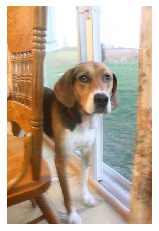

tensor([6])


'American foxhound'

In [32]:
predict_breed_transfer('dogImages/test/007.American_foxhound/American_foxhound_00524.jpg')

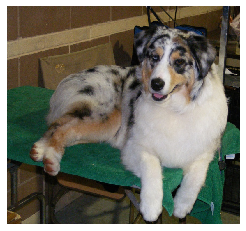

tensor([11])


'Australian shepherd'

In [33]:
predict_breed_transfer('dogImages/test/012.Australian_shepherd/Australian_shepherd_00870.jpg')

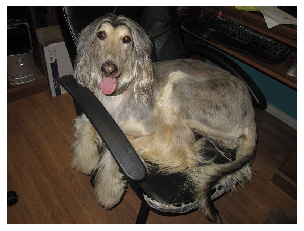

tensor([1])


'Afghan hound'

In [34]:
predict_breed_transfer('dogImages/test/002.Afghan_hound/Afghan_hound_00146.jpg')

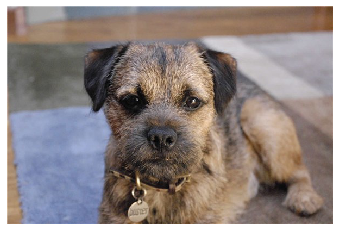

tensor([29])


'Border terrier'

In [35]:
predict_breed_transfer('dogImages/test/030.Border_terrier/Border_terrier_02136.jpg')

### Test from a random dog image from the internet

In [ ]:
predict_breed_transfer('')